In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data Siap Prepro.csv', sep=',', encoding="ISO-8859-1")


In [ ]:
df.tail()

,text
4323,hacker bjorka klaim retas surat rahasia jokowi...
4324,hacker bjorka tantang pemerintah indonesia men...
4325,ribuan dokumen milik presiden jokowi dibobol h...
4326,terkait hacker bjorka jhonny g plate illegal h...
4327,hacker bjorka meretas ribuan dokumen milik pre...


In [ ]:
# melihat jumlah baris dan kolom
df.shape

(4328, 1)

In [ ]:
#2. Proses Filtering/Preprocessing
import numpy as np
import pandas as pd
import re
import string
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#-----------------Case Folding---------------#
df['text'] = df['text'].str.lower()
print('Case Folding Result : \n')
print(df['text'])
print('\n\n\n')


Case Folding Result : 

0       pilpres jadikan indonesia bermartabat berwibaw...
1       enak emang ya pakai hastag viral jadi pansos a...
2       kamu tuh kayak jailangkung bagi ku mau datang ...
3                          btw kenapa twitter android dia
4                   om spill koruptor yg masih seger dong
                              ...                        
4323    hacker bjorka klaim retas surat rahasia jokowi...
4324    hacker bjorka tantang pemerintah indonesia men...
4325    ribuan dokumen milik presiden jokowi dibobol h...
4326    terkait hacker bjorka jhonny g plate illegal h...
4327    hacker bjorka meretas ribuan dokumen milik pre...
Name: text, Length: 4328, dtype: object






In [ ]:
#--------------Cleaning Data--------------#
from tqdm import tqdm
preprocessed_tweets = []
# tqdm is for printing the status bar
for sentance in tqdm(df['text']):
    sentance = re.sub(r'https?://\S+|www\.\S+', r'', str (sentance)) # remove URLS
    sentance = re.sub(r'<.*?>', r'', str (sentance)) # remove HTML
    sentance = re.sub(r'\d+', '', str (sentance)).strip() # remove number
    sentance = re.sub(r"[^\w\s\d]","", str (sentance)) # remove pnctuations
    sentance = re.sub(r'@\w+','', str (sentance)) # remove mentions
    sentance = re.sub(r'#\w+','', str (sentance)) # remove hash
    sentance = re.sub(r"\s+"," ", str (sentance)).strip() # remove space
    sentance = re.sub("\S*\d\S*\Ã", "", str (sentance)).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', str (sentance)) # let only alphabet
    
  
    preprocessed_tweets.append(sentance.strip())

100%|██████████| 4328/4328 [00:00<00:00, 24783.47it/s]


In [ ]:
df.tail()

,text
4323,hacker bjorka klaim retas surat rahasia jokowi...
4324,hacker bjorka tantang pemerintah indonesia men...
4325,ribuan dokumen milik presiden jokowi dibobol h...
4326,terkait hacker bjorka jhonny g plate illegal h...
4327,hacker bjorka meretas ribuan dokumen milik pre...


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df.text

0       pilpres jadikan indonesia bermartabat berwibaw...
1       enak emang ya pakai hastag viral jadi pansos a...
2       kamu tuh kayak jailangkung bagi ku mau datang ...
3                          btw kenapa twitter android dia
4                   om spill koruptor yg masih seger dong
                              ...                        
4323    hacker bjorka klaim retas surat rahasia jokowi...
4324    hacker bjorka tantang pemerintah indonesia men...
4325    ribuan dokumen milik presiden jokowi dibobol h...
4326    terkait hacker bjorka jhonny g plate illegal h...
4327    hacker bjorka meretas ribuan dokumen milik pre...
Name: text, Length: 4328, dtype: object

In [ ]:
#----------------Tokenizing----------------#
import string 
import re


In [ ]:
from nltk.tokenize import word_tokenize

x = df.iloc[0]
print(nltk.word_tokenize(x['text']))

['pilpres', 'jadikan', 'indonesia', 'bermartabat', 'berwibawa', 'dan', 'terhormat', 'di', 'mata', 'dunia', 'dengan', 'mendukung', 'anies', 'menjadi', 'presiden', 'indonesia', 'insyaallah', 'presiden', 'indonesia', 'nanti', 'aamiin', 'hongkong', 'vietnam', 'azrul', 'ananda', 'nino']


In [ ]:
def identify_tokens(row):
  message = row['text']
  tokens = nltk.word_tokenize(message)
  token_words = [w for w in tokens if w.isalpha()]
  return token_words

df['text'] = df.apply(identify_tokens, axis = 1)
df.text

0       [pilpres, jadikan, indonesia, bermartabat, ber...
1       [enak, emang, ya, pakai, hastag, viral, jadi, ...
2       [kamu, tuh, kayak, jailangkung, bagi, ku, mau,...
3                    [btw, kenapa, twitter, android, dia]
4           [om, spill, koruptor, yg, masih, seger, dong]
                              ...                        
4323    [hacker, bjorka, klaim, retas, surat, rahasia,...
4324    [hacker, bjorka, tantang, pemerintah, indonesi...
4325    [ribuan, dokumen, milik, presiden, jokowi, dib...
4326    [terkait, hacker, bjorka, jhonny, g, plate, il...
4327    [hacker, bjorka, meretas, ribuan, dokumen, mil...
Name: text, Length: 4328, dtype: object

In [ ]:
#-------------stemming---------------#
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemming = PorterStemmer()

In [ ]:
def stem_list(row):
  text = row['text']
  stem = [stemming.stem(word) for word in text]
  return (stem)

df['text'] = df.apply(stem_list, axis=1)
df.text

0       [pilpr, jadikan, indonesia, bermartabat, berwi...
1       [enak, emang, ya, pakai, hastag, viral, jadi, ...
2       [kamu, tuh, kayak, jailangkung, bagi, ku, mau,...
3                    [btw, kenapa, twitter, android, dia]
4           [om, spill, koruptor, yg, masih, seger, dong]
                              ...                        
4323    [hacker, bjorka, klaim, reta, surat, rahasia, ...
4324    [hacker, bjorka, tantang, pemerintah, indonesi...
4325    [ribuan, dokumen, milik, presiden, jokowi, dib...
4326    [terkait, hacker, bjorka, jhonni, g, plate, il...
4327    [hacker, bjorka, mereta, ribuan, dokumen, mili...
Name: text, Length: 4328, dtype: object

In [ ]:
#simpan dalam bentuk csv
df.to_csv("prepro_data_ver1.csv", sep=',')

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data Siap Prepro.csv', sep=',', encoding="ISO-8859-1")
df.head()

,text
0,pilpres jadikan indonesia bermartabat berwibaw...
1,enak emang ya pakai hastag viral jadi pansos a...
2,kamu tuh kayak jailangkung bagi ku mau datang ...
3,btw kenapa twitter android dia
4,om spill koruptor yg masih seger dong


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#--------------Filtering-------------#
#stopword
from nltk.corpus import stopwords

stops = set(stopwords.words('indonesian'))

In [21]:
def remove_stops(row):
  message = row['text']
  stopwords = [w for w in message if not w in stops]
  return stopwords

df['text'] = df.apply(remove_stops, axis = 1)
df['text'] = df['text'].str.join("")
df['text']

0       pilpres jadikan indonesia bermartabat berwibaw...
1       enak emang ya pakai hastag viral jadi pansos a...
2       kamu tuh kayak jailangkung bagi ku mau datang ...
3                          btw kenapa twitter android dia
4                   om spill koruptor yg masih seger dong
                              ...                        
4323    hacker bjorka klaim retas surat rahasia jokowi...
4324    hacker bjorka tantang pemerintah indonesia men...
4325    ribuan dokumen milik presiden jokowi dibobol h...
4326    terkait hacker bjorka jhonny g plate illegal h...
4327    hacker bjorka meretas ribuan dokumen milik pre...
Name: text, Length: 4328, dtype: object

In [22]:
df.head()

,text
0,pilpres jadikan indonesia bermartabat berwibaw...
1,enak emang ya pakai hastag viral jadi pansos a...
2,kamu tuh kayak jailangkung bagi ku mau datang ...
3,btw kenapa twitter android dia
4,om spill koruptor yg masih seger dong


In [23]:
df.tail()

,text
4323,hacker bjorka klaim retas surat rahasia jokowi...
4324,hacker bjorka tantang pemerintah indonesia men...
4325,ribuan dokumen milik presiden jokowi dibobol h...
4326,terkait hacker bjorka jhonny g plate illegal h...
4327,hacker bjorka meretas ribuan dokumen milik pre...


In [24]:
#simpan dalam bentuk csv
df.to_csv("test data hs fix.csv", sep=',')

In [25]:
#download file 
from google.colab import files
files.download('test data hs fix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
#---------------Membuat Sentimen------------------------#
#Dilakukan klasifikasi tweet(pelabelan) di RStudio
df.to_csv('Data Hasil Preprocessing.csv')

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Memanggil Data
df_data = pd.read_csv('Data Prepro Ver1 Labelling.csv', sep=';', encoding="ISO-8859-1")
df_data

,score,text,klasifikasi
0,1,"['kepoh', 'persada', 'indah', 'rumah', 'murah'...",Positif
1,1,"['sebetulnya', 'beberapa', 'penyedia', 'layana...",Positif
2,1,"['wkwkw', 'yah', 'fs', 'dipantau', 'pun', 'mak...",Positif
3,1,"['twitter', 'do', 'your', 'magic', 'bismillah'...",Positif
4,1,"['bang', 'sini', 'bang', 'ngopi', 'jaktim', 'l...",Positif
...,...,...,...
3045,-1,"['gw', 'rasa', 'kalo', 'soal', 'almamat', 'ngg...",Negatif
3046,-1,"['anj', 'tolol', 'mubahalah', 'apaan', 'goblok...",Negatif
3047,-1,"['liat', 'dari', 'beberapa', 'sudut', 'seranga...",Negatif
3048,-1,"['saya', 'tidak', 'akan', 'berbicara', 'dengan...",Negatif


In [28]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import csv
import string
import nltk
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [29]:
#-------------TF-IDF-----------#
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_data['text'])
vectorizer.get_feature_names_out()
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
tfidf

<3050x8059 sparse matrix of type '<class 'numpy.float64'>'
	with 38259 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.model_selection import train_test_split

x = df_data['text']
y = df_data['klasifikasi']

#x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.2, random_state=0)

In [34]:
x_train

NameError: ignored

In [35]:
x_test

NameError: ignored

In [ ]:
x_train.shape, x_test.shape

((2440,), (610,))

In [ ]:
# vectorisasi
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [ ]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(2440, 7016)
(610, 7016)


In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#SVM LINIER
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
for c in [0.01,0.05,0.25,0.5,1]:
  svm = SVC(kernel='linear', C=c)
  svm.fit(x_train, y_train)
  print('Akurasi untuk C = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test))))

Akurasi untuk C = 0.01: 0.7524590163934426
Akurasi untuk C = 0.05: 0.8213114754098361
Akurasi untuk C = 0.25: 0.8950819672131147
Akurasi untuk C = 0.5: 0.8885245901639345
Akurasi untuk C = 1: 0.8950819672131147


In [ ]:
########################################################################################################## (coba dengan 80 : 20)

In [ ]:
#############################################################################################

In [ ]:
print('Final Model SVM Akurasi: %s' %accuracy_score(y_test, svm.predict(x_test)))

Final Model SVM Akurasi: 0.8950819672131147


In [ ]:
# evaluasi model svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_predd = svm.predict(x_test)
print('Akurasi of SVM classifier on test set: {:.4f}'.format(svm.score(x_test, y_test)))
print(classification_report(y_test, y_predd))

Akurasi of SVM classifier on test set: 0.8951
              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93       459
     Positif       0.84      0.72      0.77       151

    accuracy                           0.90       610
   macro avg       0.87      0.83      0.85       610
weighted avg       0.89      0.90      0.89       610



Text(7.299999999999997, 0.5, 'Actual')

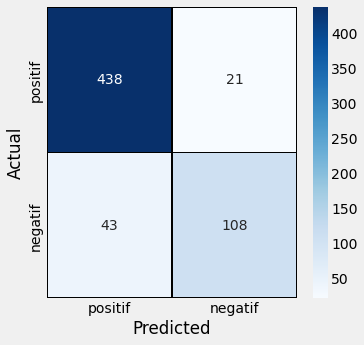

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test, y_predd)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['positif','negatif'], 
            yticklabels = ['positif','negatif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
df_data

,score,text,klasifikasi
0,1,"['kepoh', 'persada', 'indah', 'rumah', 'murah'...",Positif
1,1,"['sebetulnya', 'beberapa', 'penyedia', 'layana...",Positif
2,1,"['wkwkw', 'yah', 'fs', 'dipantau', 'pun', 'mak...",Positif
3,1,"['twitter', 'do', 'your', 'magic', 'bismillah'...",Positif
4,1,"['bang', 'sini', 'bang', 'ngopi', 'jaktim', 'l...",Positif
...,...,...,...
3045,-1,"['gw', 'rasa', 'kalo', 'soal', 'almamat', 'ngg...",Negatif
3046,-1,"['anj', 'tolol', 'mubahalah', 'apaan', 'goblok...",Negatif
3047,-1,"['liat', 'dari', 'beberapa', 'sudut', 'seranga...",Negatif
3048,-1,"['saya', 'tidak', 'akan', 'berbicara', 'dengan...",Negatif


In [ ]:
#######################################################################

In [36]:
wr_data = pd.read_csv('/content/data untuk wordcloud.csv', sep=';', encoding="ISO-8859-1")
wr_data

FileNotFoundError: ignored

<function matplotlib.pyplot.show>

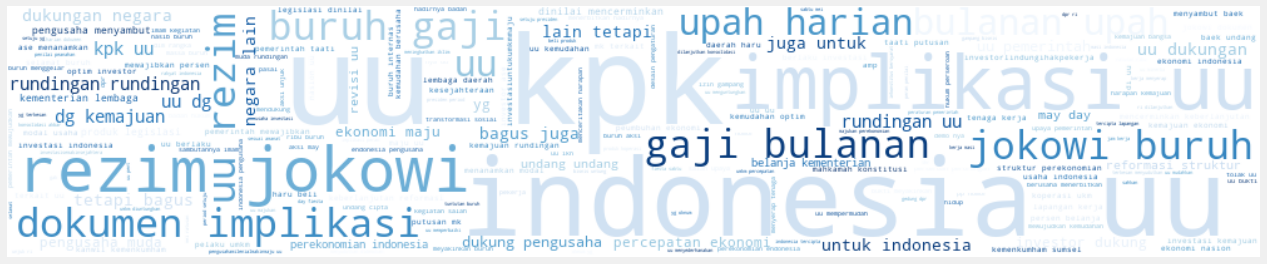

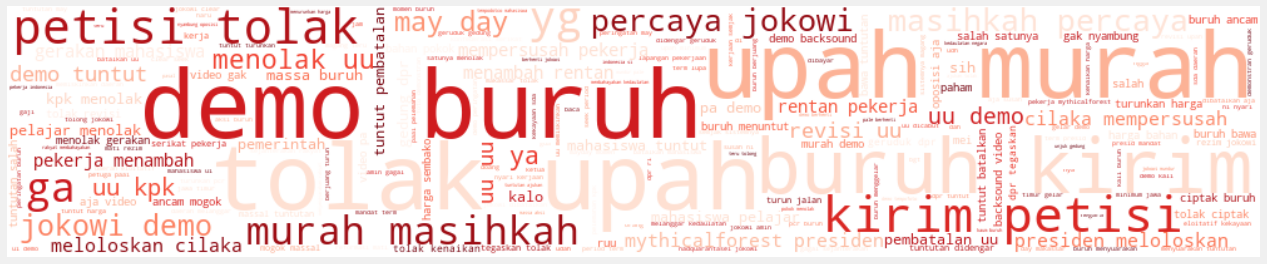

In [ ]:
#menampilkan wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Positif
train_kdr = wr_data[wr_data['klasifikasi'] == 'Positif']
all_text_pst = ' '.join(word for word in train_kdr['text'])
wordcloud = WordCloud(colormap = 'Blues', width = 1000, mode = 'RGBA', background_color = 'white').generate(all_text_pst)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show

#Negatif
train_kdr = wr_data[wr_data['klasifikasi'] == 'Negatif']
all_text_pst = ' '.join(word for word in train_kdr['text'])
wordcloud = WordCloud(colormap = 'Reds', width = 1000, mode = 'RGBA', background_color = 'white').generate(all_text_pst)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show
